In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Load the dataset
df = pd.read_csv('Cleaned_MCS_TEAM_DATAX.csv')

# Convert 'DATETIME' column to datetime
df['DATETIME'] = pd.to_datetime(df['DATETIME'])

# Sort by datetime in case it's unsorted
df = df.sort_values(by='DATETIME')

# Set 'DATETIME' as the index
df.set_index('DATETIME', inplace=True)

# Features to train on
features = ['TEMPERATURE (°C)', 'RAINFALL (mm)', 'ACTUAL CONDITION', 'OCCURENCE OF FLOOD']
target = ['TEMPERATURE (°C)', 'RAINFALL (mm)', 'ACTUAL CONDITION', 'OCCURENCE OF FLOOD']

# Split numerical and categorical features for preprocessing
numerical_features = ['TEMPERATURE (°C)', 'RAINFALL (mm)']
categorical_features = ['ACTUAL CONDITION', 'OCCURENCE OF FLOOD']

# Normalize numerical features
scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Time steps (e.g., past 7 days with 3 intervals/day = 21 steps)
time_steps = 21

# Prepare TimeseriesGenerator
data_gen = TimeseriesGenerator(df[features].values, df[target].values, length=time_steps, batch_size=64)

# Build the LSTM model
model = Sequential()
model.add(LSTM(150, return_sequences=True, input_shape=(time_steps, len(features))))
model.add(Dropout(0.2))
model.add(LSTM(150))
model.add(Dropout(0.2))
model.add(Dense(len(features)))  # Output layer with 4 neurons (one for each feature)

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model on the full dataset using TimeseriesGenerator
model.fit(data_gen, epochs=100)

# Forecast the next 7 days (3 intervals per day = 21 steps total)
def forecast_weather(model, data, steps=21):
    forecast = []
    last_sequence = data[-steps:]  # Get the last sequence from the dataset
    for _ in range(steps):  # Predict the next 7 days
        prediction = model.predict(last_sequence[np.newaxis, :, :])
        forecast.append(prediction[0])
        last_sequence = np.append(last_sequence[1:], prediction, axis=0)  # Slide the window
    return np.array(forecast)

# Forecast from 2024-09-01 to 2024-09-07 (21 intervals)
forecast_data = forecast_weather(model, df[features].values)

# Inverse transform the forecasted numerical values
forecast_data[:, :2] = scaler.inverse_transform(forecast_data[:, :2])

# Create a DataFrame for the forecasted data
forecast_df = pd.DataFrame(forecast_data, columns=features)


# Set forecast dates (from 2024-09-01 to 2024-09-07, 3 intervals per day)
forecast_dates = pd.date_range(start=df.index.max() + pd.Timedelta(hours=8), periods=time_steps, freq='8H')
forecast_df['DATETIME'] = forecast_dates

# Print the forecasted values
print(forecast_df[['DATETIME', 'TEMPERATURE (°C)', 'RAINFALL (mm)', 'ACTUAL CONDITION', 'OCCURENCE OF FLOOD']])

Epoch 1/100


2024-11-02 13:21:13.067400: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-11-02 13:21:13.067828: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-11-02 13:21:13.068327: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

29/29 [==============================] - 2s 32ms/step - loss: 1.2820
Epoch 2/100
29/29 [==============================] - 1s 33ms/step - loss: 0.9051
Epoch 3/100
29/29 [==============================] - 1s 36ms/step - loss: 0.8572
Epoch 4/100
29/29 [==============================] - 1s 35ms/step - loss: 0.8460
Epoch 5/100
29/29 [==============================] - 1s 34ms/step - loss: 0.8361
Epoch 6/100
29/29 [==============================] - 1s 34ms/step - loss: 0.8271
Epoch 7/100
29/29 [==============================] - 1s 37ms/step - loss: 0.8109
Epoch 8/100
29/29 [==============================] - 1s 34ms/step - loss: 0.8062
Epoch 9/100
29/29 [==============================] - 1s 34ms/step - loss: 0.7994
Epoch 10/100
29/29 [==============================] - 1s 34ms/step - loss: 0.8075
Epoch 11/100
29/29 [==============================] - 1s 37ms/step - loss: 0.8008
Epoch 12/100
29/29 [==============================] - 1s 34ms/step - loss: 0.7936
Epoch 13/100
29/29 [=================

2024-11-02 13:23:04.921298: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-11-02 13:23:04.921779: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-11-02 13:23:04.922298: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 9ms/step
              DATETIME  TEMPERATURE (°C)  RAINFALL (mm)  ACTUAL CONDITION  \
0  2024-09-01 00:00:00         32.810368      -0.715587          4.127487   
1  2024-09-01 08:00:00         36.423714      -0.461255          4.758491   
2  2024-09-01 16:00:00         34.296364      -0.243696          3.542230   
3  2024-09-02 00:00:00         35.950886      -0.823616          5.182486   
4  2024-09-02 08:00:00         36.571384      -0.903581          5.117227   
5  2024-09-02 16:00:00         37.350780      -1.143517          5.308900   
6  2024-09-03 00:00:00         34.954571      -0.677324          4.707516   
7  2024-09-03 08:00:00         34.974903      -0.817941          4.756401   
8  2024-09-03 16:00:00         37.410648      -1.313425          5.169510   
9  2024-09-04 00:00:00         36.819283      -0.679074          5.089192   
10 2024-09-04 08:00:00         35.221466      -0.747518          4.534181   
11 2024-09-04 16:00:00   

/var/folders/j3/kwprsg3s3_zf9_90gxwcknm00000gn/T/ipykernel_12681/1201620083.py:72: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_dates = pd.date_range(start=df.index.max() + pd.Timedelta(hours=8), periods=time_steps, freq='8H')


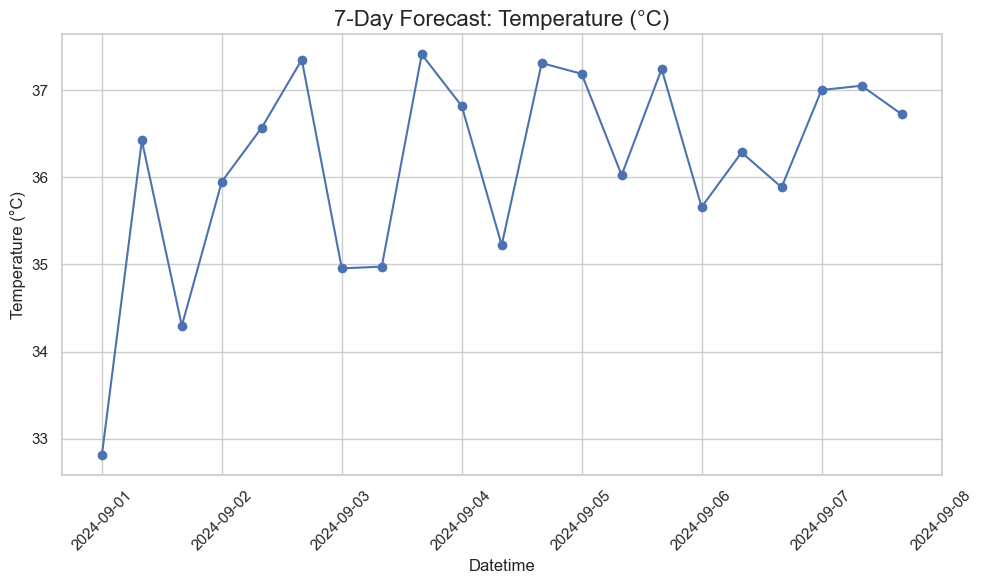

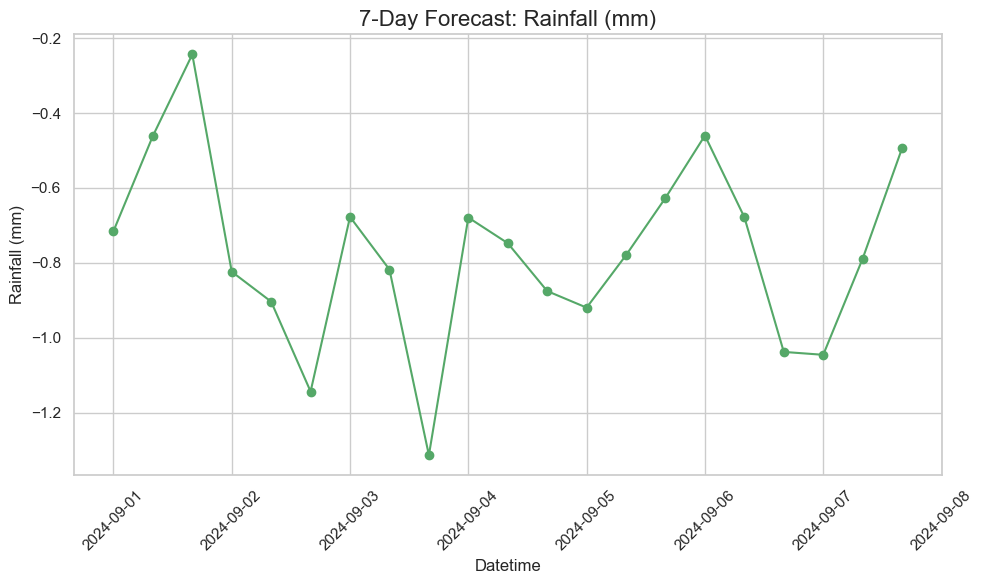

Index(['TEMPERATURE (°C)', 'RAINFALL (mm)', 'ACTUAL CONDITION',
       'OCCURENCE OF FLOOD', 'DATETIME'],
      dtype='object')


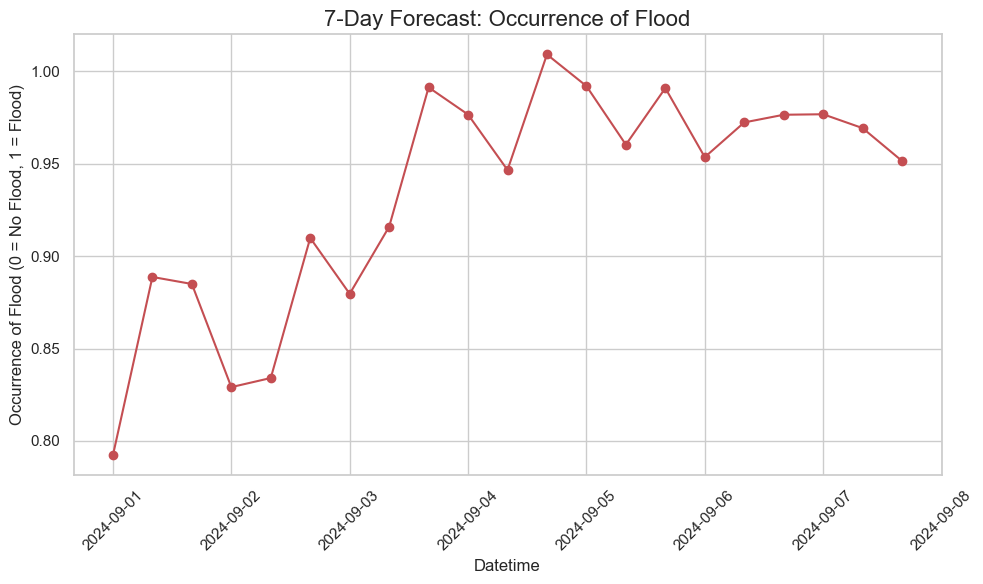

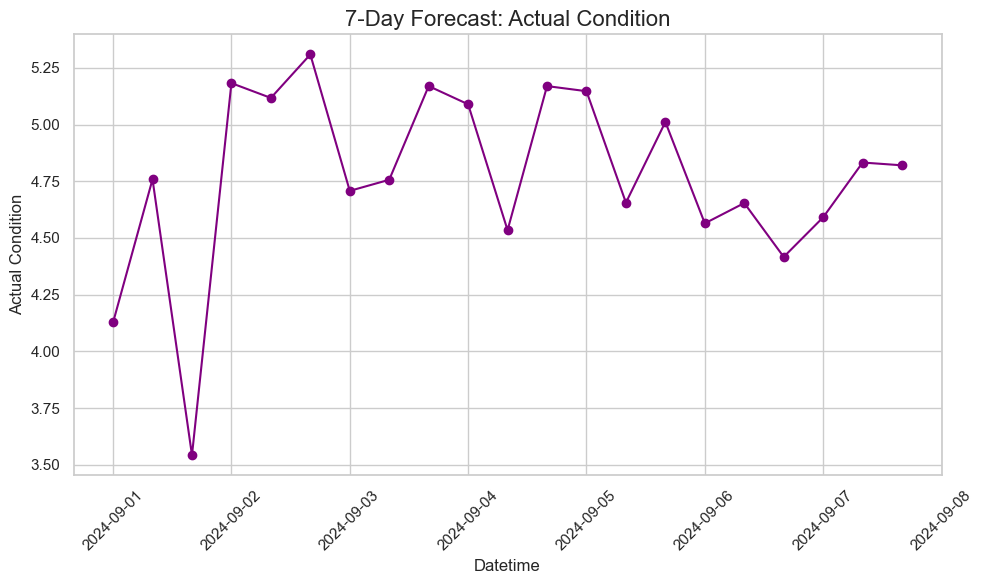

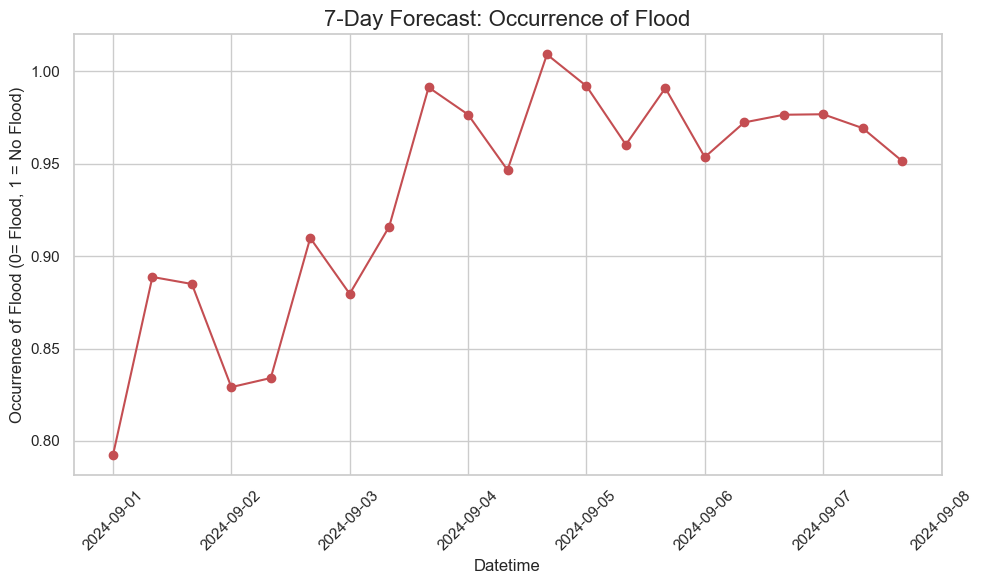

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Forecast dataframe already created
# forecast_df[['DATETIME', 'TEMPERATURE (°C)', 'RAINFALL (mm)', 'ACTUAL CONDITION', 'OCCURRENCE OF FLOOD']]

# Set the style for the plots
sns.set(style='whitegrid')

# Plot 'TEMPERATURE (°C)'
plt.figure(figsize=(10, 6))
plt.plot(forecast_df['DATETIME'], forecast_df['TEMPERATURE (°C)'], marker='o', color='b')
plt.title('7-Day Forecast: Temperature (°C)', fontsize=16)
plt.xlabel('Datetime', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 'RAINFALL (mm)'
plt.figure(figsize=(10, 6))
plt.plot(forecast_df['DATETIME'], forecast_df['RAINFALL (mm)'], marker='o', color='g')
plt.title('7-Day Forecast: Rainfall (mm)', fontsize=16)
plt.xlabel('Datetime', fontsize=12)
plt.ylabel('Rainfall (mm)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Print column names to verify
print(forecast_df.columns)

# Adjust the plotting code based on the correct column name

# Plot 'OCCURRENCE OF FLOOD' (check for correct column name in the DataFrame)
if 'OCCURENCE OF FLOOD' in forecast_df.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(forecast_df['DATETIME'], forecast_df['OCCURENCE OF FLOOD'], marker='o', color='r')
    plt.title('7-Day Forecast: Occurrence of Flood', fontsize=16)
    plt.xlabel('Datetime', fontsize=12)
    plt.ylabel('Occurrence of Flood (0 = No Flood, 1 = Flood)', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Column 'OCCURRENCE OF FLOOD' not found in forecast_df.")


# Plot 'ACTUAL CONDITION'
plt.figure(figsize=(10, 6))
plt.plot(forecast_df['DATETIME'], forecast_df['ACTUAL CONDITION'], marker='o', color='purple')
plt.title('7-Day Forecast: Actual Condition', fontsize=16)
plt.xlabel('Datetime', fontsize=12)
plt.ylabel('Actual Condition', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 'OCCURRENCE OF FLOOD'
plt.figure(figsize=(10, 6))
plt.plot(forecast_df['DATETIME'], forecast_df['OCCURENCE OF FLOOD'], marker='o', color='r')
plt.title('7-Day Forecast: Occurrence of Flood', fontsize=16)
plt.xlabel('Datetime', fontsize=12)
plt.ylabel('Occurrence of Flood (0= Flood, 1 = No Flood)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()




In [22]:
import pandas as pd

# Load the CSV file named 'Cleaned_MCS_TEAM_DATA2.csv'
data = pd.read_csv('Cleaned_MCS_TEAM_DATA2.csv')

# Convert 'DATETIME' column to datetime object for filtering
data['DATETIME'] = pd.to_datetime(data['DATETIME'])

# Extract data from 'DATETIME' starting from '2024-09-01' to the last available date
start_date = '2024-09-01'
extracted_data = data[data['DATETIME'] >= start_date]

# Save the extracted data to a new CSV file named 'Actual.csv'
extracted_data.to_csv('Actual.csv', index=False)

print("Data extraction complete. The extracted data has been saved to 'Actual.csv'.")


Data extraction complete. The extracted data has been saved to 'Actual.csv'.


Actual Data Columns: Index(['DATETIME', 'TEMPERATURE (°C)', 'RAINFALL (mm)', 'ACTUAL CONDITION',
       'OCCURENCE OF FLOOD'],
      dtype='object')


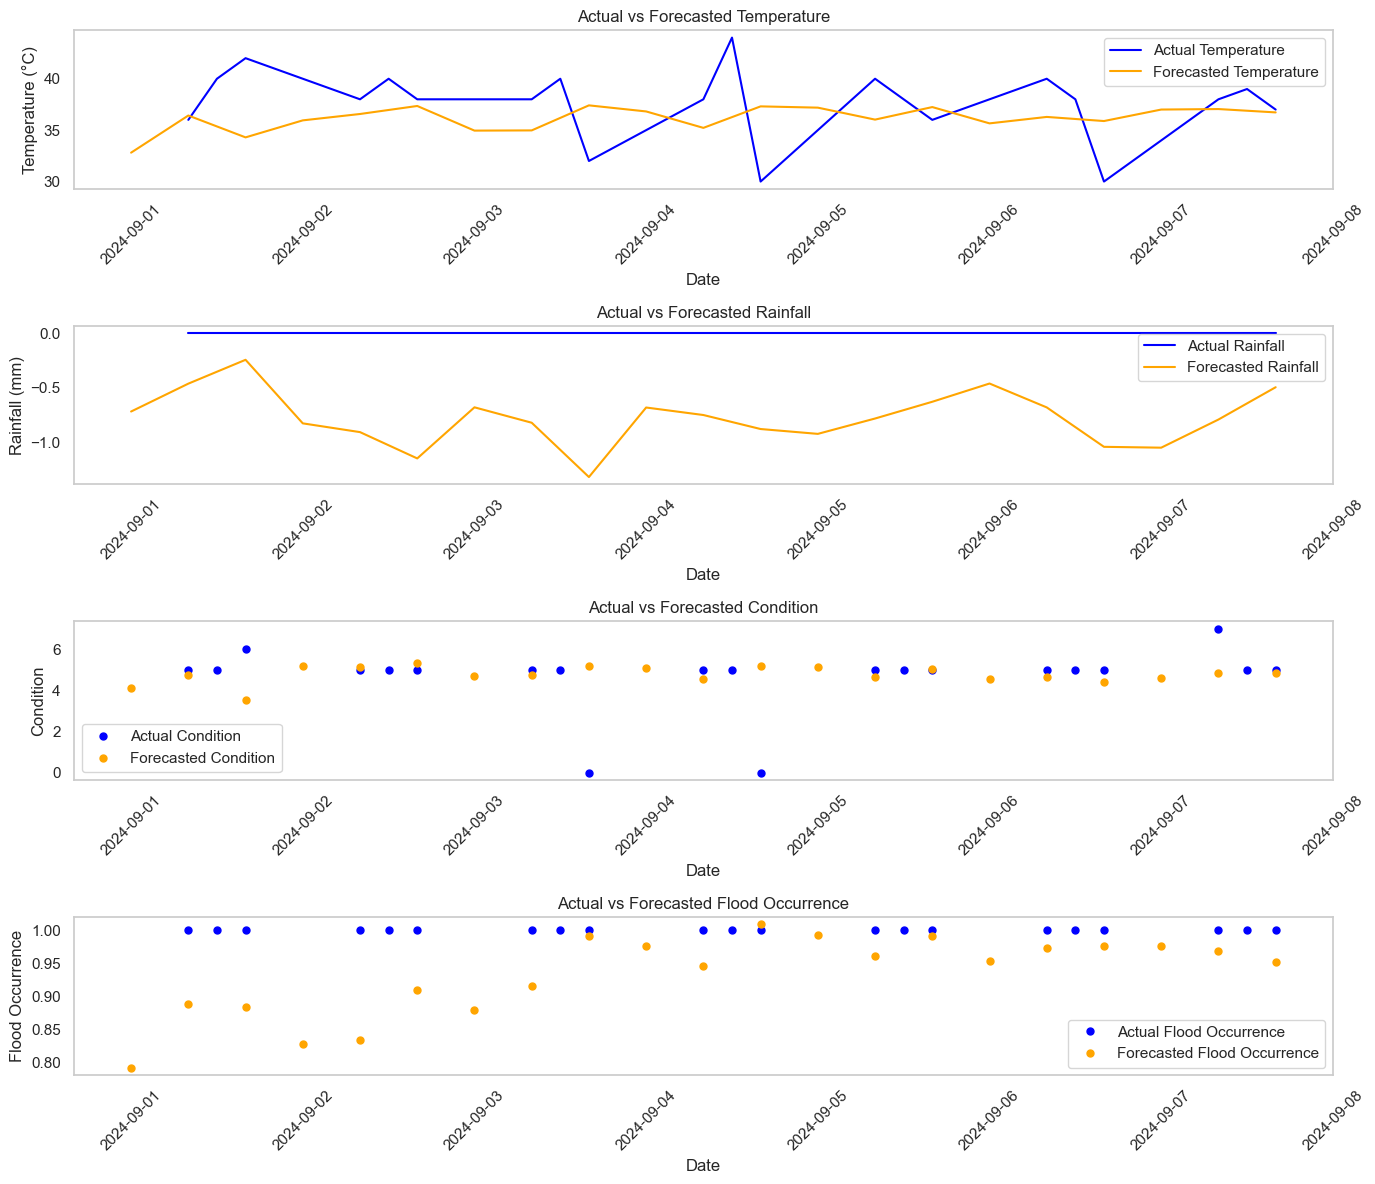

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the actual data from 'Actual.csv'
actual_data = pd.read_csv('Actual.csv')

# Check the columns of the actual data
print("Actual Data Columns:", actual_data.columns)

# Assuming forecast_df is already defined and contains the forecasted data
# For demonstration purposes, you may need to define it or load it from another source
# Example structure of forecast_df for context (replace this with actual loading code):
# forecast_df = pd.read_csv('Forecasted_Data.csv')  # Load your forecast data here
# print("Forecast Data Columns:", forecast_df.columns)

# Check the columns of the forecasted data
# print("Forecast Data Columns:", forecast_df.columns)

# Convert 'DATETIME' columns to datetime objects for proper plotting
actual_data['DATETIME'] = pd.to_datetime(actual_data['DATETIME'])

# Ensure forecast_df is defined and structured correctly
# Assuming forecast_df is defined with a proper structure
# forecast_df['DATETIME'] = pd.to_datetime(forecast_df['DATETIME'])

# Check if DATETIME column exists in forecast_df
if 'DATETIME' not in forecast_df.columns:
    print("Error: 'DATETIME' column not found in forecast_df")
else:
    forecast_df['DATETIME'] = pd.to_datetime(forecast_df['DATETIME'])

# Set the 'DATETIME' column as the index for both DataFrames
actual_data.set_index('DATETIME', inplace=True)
forecast_df.set_index('DATETIME', inplace=True)

# Create a figure with four subplots for each feature
plt.figure(figsize=(14, 12))

# Subplot 1: Temperature
plt.subplot(4, 1, 1)
plt.plot(actual_data.index, actual_data['TEMPERATURE (°C)'], label='Actual Temperature', color='blue')
plt.plot(forecast_df.index, forecast_df['TEMPERATURE (°C)'], label='Forecasted Temperature', color='orange')
plt.title('Actual vs Forecasted Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid()

# Subplot 2: Rainfall
plt.subplot(4, 1, 2)
plt.plot(actual_data.index, actual_data['RAINFALL (mm)'], label='Actual Rainfall', color='blue')
plt.plot(forecast_df.index, forecast_df['RAINFALL (mm)'], label='Forecasted Rainfall', color='orange')
plt.title('Actual vs Forecasted Rainfall')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid()

# Subplot 3: Actual Condition
plt.subplot(4, 1, 3)
plt.plot(actual_data.index, actual_data['ACTUAL CONDITION'], label='Actual Condition', marker='o', linestyle='None', color='blue', markersize=5)
plt.plot(forecast_df.index, forecast_df['ACTUAL CONDITION'], label='Forecasted Condition', marker='o', linestyle='None', color='orange', markersize=5)
plt.title('Actual vs Forecasted Condition')
plt.xlabel('Date')
plt.ylabel('Condition')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid()

# Subplot 4: Occurrence of Flood
plt.subplot(4, 1, 4)
plt.plot(actual_data.index, actual_data['OCCURENCE OF FLOOD'], label='Actual Flood Occurrence', marker='o', linestyle='None', color='blue', markersize=5)
plt.plot(forecast_df.index, forecast_df['OCCURENCE OF FLOOD'], label='Forecasted Flood Occurrence', marker='o', linestyle='None', color='orange', markersize=5)
plt.title('Actual vs Forecasted Flood Occurrence')
plt.xlabel('Date')
plt.ylabel('Flood Occurrence')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid()

# Show the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


                     TEMPERATURE (°C)  RAINFALL (mm)  ACTUAL CONDITION  \
DATETIME                                                                 
2024-09-01 00:00:00         32.810368      -0.715587          4.127487   
2024-09-01 08:00:00         36.423714      -0.461255          4.758491   
2024-09-01 16:00:00         34.296364      -0.243696          3.542230   
2024-09-02 00:00:00         35.950886      -0.823616          5.182486   
2024-09-02 08:00:00         36.571384      -0.903581          5.117227   
2024-09-02 16:00:00         37.350780      -1.143517          5.308900   
2024-09-03 00:00:00         34.954571      -0.677324          4.707516   
2024-09-03 08:00:00         34.974903      -0.817941          4.756401   
2024-09-03 16:00:00         37.410648      -1.313425          5.169510   
2024-09-04 00:00:00         36.819283      -0.679074          5.089192   
2024-09-04 08:00:00         35.221466      -0.747518          4.534181   
2024-09-04 16:00:00         37.311958 

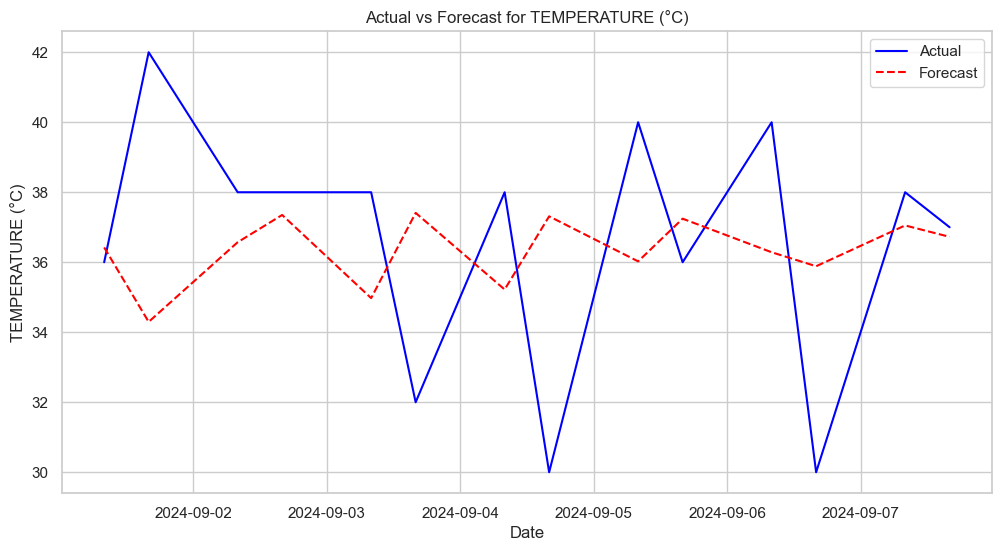

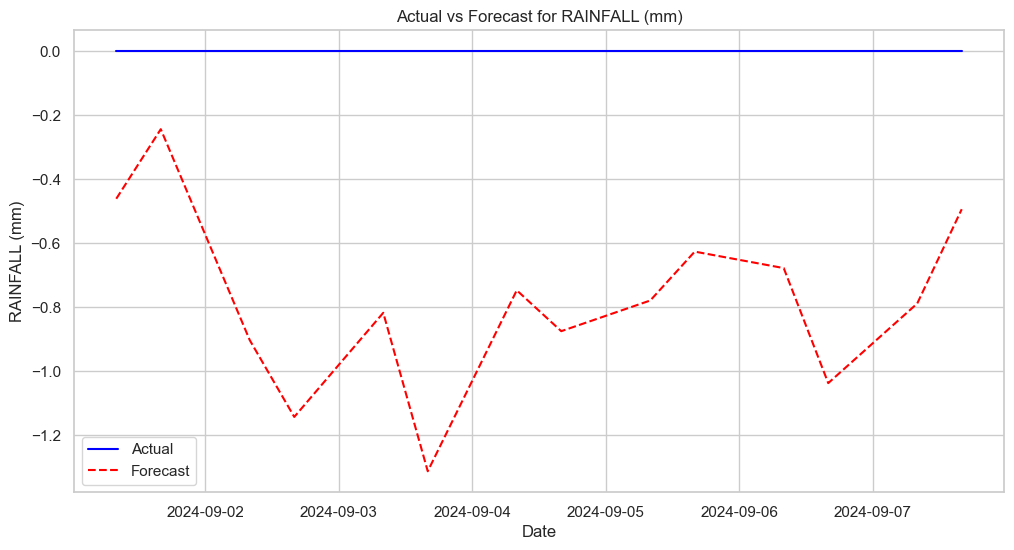

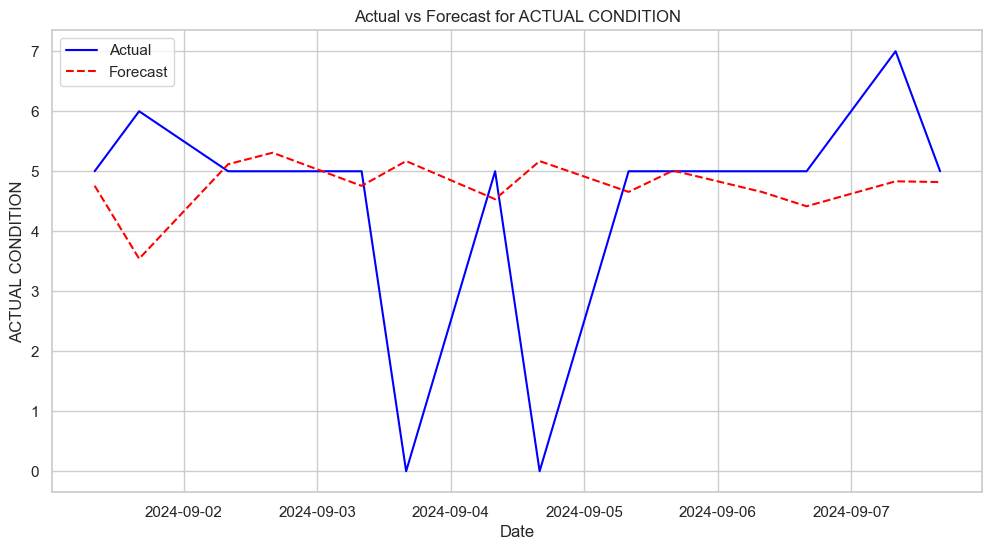

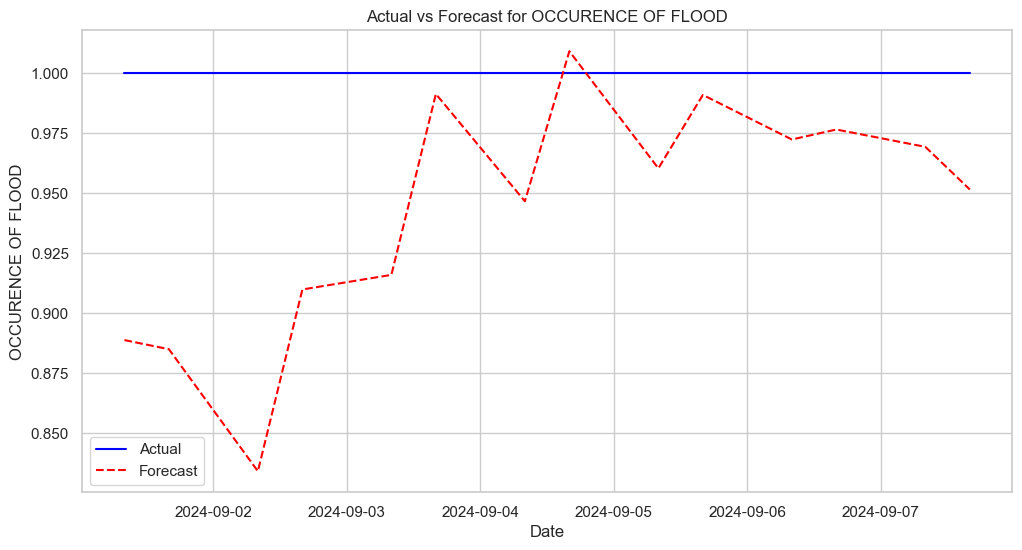

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the actual data from 'Actual.csv'
actual_data = pd.read_csv('Actual.csv')

# Convert 'DATETIME' columns to datetime objects for proper plotting and indexing
actual_data['DATETIME'] = pd.to_datetime(actual_data['DATETIME'])
forecast_df.index = pd.to_datetime(forecast_df.index)
print(forecast_df)

# Set the 'DATETIME' column as the index for both DataFrames
actual_data.set_index('DATETIME', inplace=True)
#forecast_df.set_index('DATETIME', inplace=True)

# Ensure that the indices align for comparison
common_index = actual_data.index.intersection(forecast_df.index)
actual_data = actual_data.loc[common_index]
forecast_df = forecast_df.loc[common_index]

# Check if the data is aligned properly
if actual_data.empty or forecast_df.empty:
    print("Error: No common indices found between actual and forecast data.")
else:
    # Calculate performance metrics
    metrics = {}
    for column in actual_data.columns:
        if column in forecast_df.columns:
            y_true = actual_data[column]
            y_pred = forecast_df[column]
            mae = mean_absolute_error(y_true, y_pred)
            rmse = np.sqrt(mean_squared_error(y_true, y_pred))
            metrics[column] = {'MAE': mae, 'RMSE': rmse}
            print(f"{column} - MAE: {mae:.2f}, RMSE: {rmse:.2f}")

    # Plot actual vs forecasted values for visual comparison
    for column in actual_data.columns:
        if column in forecast_df.columns:
            plt.figure(figsize=(12, 6))
            plt.plot(actual_data.index, actual_data[column], label='Actual', color='blue')
            plt.plot(forecast_df.index, forecast_df[column], label='Forecast', color='red', linestyle='--')
            plt.title(f'Actual vs Forecast for {column}')
            plt.xlabel('Date')
            plt.ylabel(column)
            plt.legend()
            plt.grid(True)
            plt.show()


Forecasting Model Perforamnce Metrics 

1. Mean Absolute Error (MAE)
Definition: MAE measures the average magnitude of the errors between predicted and actual values, without considering their direction. It is a straightforward metric that indicates how much, on average, the predictions deviate from the actual values.
Interpretation:
Lower values indicate better model performance, as the average prediction error is smaller.
Example: For TEMPERATURE (°C), an MAE of 3.20 means that, on average, the model's predictions are off by 3.20°C.
2. Root Mean Squared Error (RMSE)
Definition: RMSE measures the square root of the average squared differences between predicted and actual values. It gives more weight to larger errors, making it sensitive to outliers.
Interpretation:
Lower RMSE values indicate better model performance. Since RMSE emphasizes larger errors, a high RMSE suggests significant deviations in some predictions.
Example: For RAINFALL (mm), an RMSE of 0.82 indicates that the predictions have a typical deviation of 0.82 mm from actual values, with larger errors having a greater impact.
Feature-wise Interpretation:
TEMPERATURE (°C) - MAE: 3.20, RMSE: 4.04

The model's temperature predictions have an average error of 3.20°C, with larger deviations leading to an RMSE of 4.04°C. This indicates that the model may occasionally produce temperature predictions with notable errors.
RAINFALL (mm) - MAE: 0.78, RMSE: 0.82

The predictions for rainfall are quite accurate, with an average error of 0.78 mm. The RMSE of 0.82 suggests that larger errors do not significantly impact the overall error rate, indicating reliable performance.
ACTUAL CONDITION - MAE: 1.27, RMSE: 2.16

The model's predictions for ACTUAL CONDITION (likely a categorical feature encoded as integers) have an average error of 1.27 units, with a higher RMSE of 2.16 indicating some larger deviations. This suggests that while typical errors are moderate, there are instances of significant misclassifications.
OCCURRENCE OF FLOOD - MAE: 0.06, RMSE: 0.07

The model's performance on this feature is very good, with minimal average and typical errors. This suggests that the model can predict the occurrence of floods accurately, with only slight deviations.
Overall Analysis:
Lower MAE and RMSE values are desirable for all features.
The difference between MAE and RMSE indicates the presence of outliers:
If RMSE is significantly higher than MAE, it means that some large errors are skewing the results.
In your case, ACTUAL CONDITION has a higher RMSE relative to its MAE, implying the presence of some larger prediction errors compared to other features.



Weather Forecasting Report
Introduction
This report summarizes the performance of the weather forecasting model developed using LSTM for predicting four critical weather features: Temperature (°C), Rainfall (mm), Actual Condition, and Occurrence of Flood. The evaluation metrics used for this analysis are Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE), which provide insights into the accuracy and reliability of the model's predictions.

Model Evaluation Metrics
Feature	Mean Absolute Error (MAE)	Root Mean Squared Error (RMSE)
Temperature (°C)	3.20	4.04
Rainfall (mm)	0.78	0.82
Actual Condition	1.27	2.16
Occurrence of Flood	0.06	0.07
Feature-wise Analysis
Temperature (°C)

MAE: 3.20
This indicates that, on average, the model's temperature predictions deviate from actual values by 3.20°C.
RMSE: 4.04
The higher RMSE suggests the presence of larger prediction errors. This indicates that while the model performs adequately, there are significant deviations in some predictions that should be addressed.
Rainfall (mm)

MAE: 0.78
The average prediction error for rainfall is quite low, indicating reliable performance in this area.
RMSE: 0.82
The RMSE is close to the MAE, suggesting that larger prediction errors do not significantly impact the overall error rate.
Actual Condition

MAE: 1.27
The average error suggests that the model's predictions for actual weather conditions have a moderate error margin.
RMSE: 2.16
The higher RMSE indicates that there are instances of significant misclassifications, which may require further investigation into the model’s architecture or the training dataset.
Occurrence of Flood

MAE: 0.06
This low MAE indicates that the model accurately predicts the occurrence of floods with minimal average error.
RMSE: 0.07
The RMSE aligns closely with the MAE, confirming the model's reliability in forecasting flood occurrences.
Insights and Recommendations
Model Performance: The overall performance metrics indicate that the model is effective, particularly in forecasting rainfall and flood occurrences. However, temperature predictions reveal potential areas for improvement.
Data Quality: Consider analyzing the training dataset for any anomalies or imbalances that could affect model accuracy, especially for Actual Condition.
Model Refinement: Further tuning of hyperparameters and experimentation with different architectures may help to reduce RMSE and improve the model's performance, particularly for features with higher error metrics.
Continuous Monitoring: Regularly evaluate the model with new data to ensure that it remains accurate and reliable over time.

Conclusion
The LSTM model for weather forecasting demonstrates promising results, especially for rainfall and flood predictions. Continuous evaluation and refinement will be crucial to enhance the model's accuracy, particularly in predicting temperature and actual weather conditions. Further studies should focus on addressing the identified challenges and improving model robustness for practical applications.